In [ ]:
!pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py

In [ ]:
!pip install tensorflow torch torchvision umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=565b4a3e879b4b2acf5faab68a9b1be2aaa621ead1101d75fd6098c0c33e1ff8
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd
import csv
import sys
import fiftyone as fo
import fiftyone.zoo as foz
import torchvision.models.detection as models
import torch
from PIL import Image
from torchvision.transforms import functional as func
from fiftyone import ViewField as F
import collections
import matplotlib.patches as patches


Migrating database to v0.23.2


INFO:fiftyone.migrations.runner:Migrating database to v0.23.2


**COCO Part**

In [ ]:
# Load the COCO dataset
coco_dataset= foz.load_zoo_dataset("coco-2017", split="validation", dataset_dir="coco-analysis")

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to 'coco-analysis/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to 'coco-analysis/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [5.9s elapsed, 0s remaining, 330.0Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [5.9s elapsed, 0s remaining, 330.0Mb/s]       


Extracting annotations to 'coco-analysis/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to 'coco-analysis/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to 'coco-analysis/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [18.4s elapsed, 0s remaining, 368.0Mb/s]      


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [18.4s elapsed, 0s remaining, 368.0Mb/s]      


Extracting images to 'coco-analysis/validation/data'


INFO:fiftyone.utils.coco:Extracting images to 'coco-analysis/validation/data'


Writing annotations to 'coco-analysis/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to 'coco-analysis/validation/labels.json'


Dataset info written to 'coco-analysis/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to 'coco-analysis/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [37.0s elapsed, 0s remaining, 199.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [37.0s elapsed, 0s remaining, 199.7 samples/s]      


Dataset 'coco-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation' created


In [ ]:
print(coco_dataset)

Name:        coco-2017-validation
Media type:  image
Num samples: 5000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


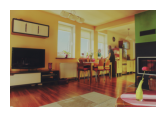

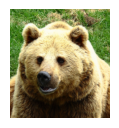

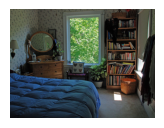

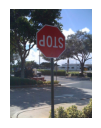

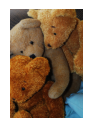

In [ ]:
#some photos from dataset
def print_photos(dataset, n):
  for sample in dataset[:n]:

    # Access image path
    image_path = sample.filepath

    # Display the image using PIL and matplotlib
    img = Image.open(image_path)
    plt.subplot(3, 3, 1)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

print_photos(coco_dataset, 5)

In [ ]:
# Launch the FiftyOne App to explore the dataset
session = fo.launch_app(coco_dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.2

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



# prints of some ground truth

In [ ]:
def print_ground_truth(dataset, n):
  # Iterate over the samples
  for sample in dataset[:n]:  # Print ground truth for the first n samples
    print("Image: ", sample.filepath)

    # Access ground truth annotations
    ground_truth = sample.ground_truth

    # Iterate over the detections in the ground truth
    for i, detection in enumerate(ground_truth.detections):
        print(f"  Annotation {i + 1}:")
        print(f"    Class: {detection.label}, Bounding Box: {detection.bounding_box}")

    print("\n")

print_ground_truth(coco_dataset, 5)

Image:  /content/coco-analysis/validation/data/000000000139.jpg
  Annotation 1:
    Class: potted plant, Bounding Box: [0.37028125, 0.3345305164319249, 0.038593749999999996, 0.16314553990610328]
  Annotation 2:
    Class: tv, Bounding Box: [0.010984375000000001, 0.39380281690140845, 0.23331249999999998, 0.22269953051643193]
  Annotation 3:
    Class: tv, Bounding Box: [0.8706406250000001, 0.491056338028169, 0.127109375, 0.18481220657276995]
  Annotation 4:
    Class: chair, Bounding Box: [0.56090625, 0.5118544600938968, 0.0875, 0.24138497652582158]
  Annotation 5:
    Class: chair, Bounding Box: [0.454203125, 0.5117370892018779, 0.096609375, 0.2311737089201878]
  Annotation 6:
    Class: chair, Bounding Box: [0.645625, 0.5234976525821596, 0.047140625000000005, 0.19098591549295774]
  Annotation 7:
    Class: chair, Bounding Box: [0.4959375, 0.5146478873239437, 0.03371875, 0.02720657276995305]
  Annotation 8:
    Class: person, Bounding Box: [0.645, 0.3699765258215963, 0.082890625, 0.323

640
426


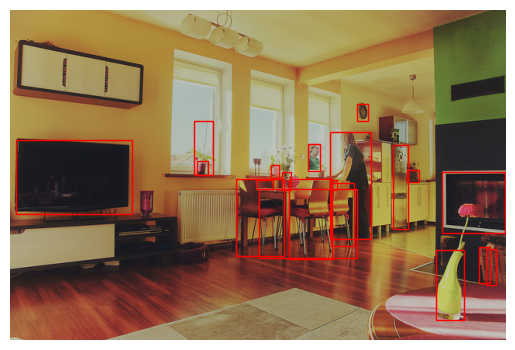

586
640


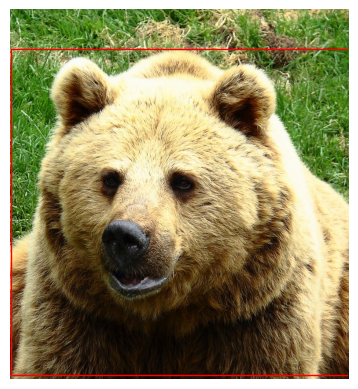

640
483


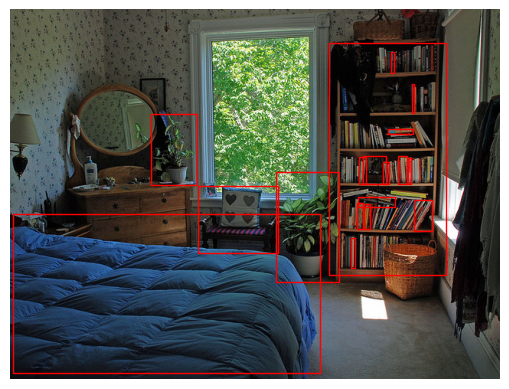

375
500


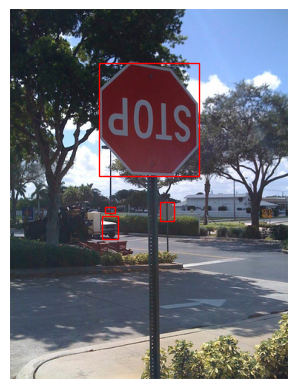

428
640


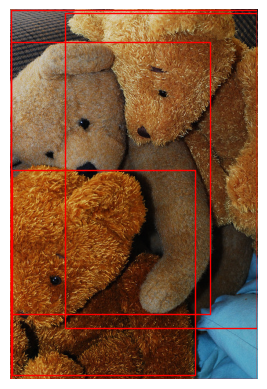

In [ ]:
def visualize_ground_truth(dataset, n):
  # Assuming you have already loaded or defined your coco_dataset

  for sample in dataset[:n]:
    # Load the image
    img = Image.open(sample.filepath)
    width, height = img.size  # Get the width and height of the image
    print(width)
    print(height)

    # Access ground truth annotations
    ground_truth = sample.get_field("ground_truth")

    # Create a figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Iterate over the detections in the ground truth
    for detection in ground_truth.detections:
        # Extract bounding box coordinates (assuming relative coordinates)
        bbox = detection.bounding_box
        xmin, ymin, xmax, ymax = bbox

        # Scale the coordinates to image dimensions
        xmin *= width
        xmax *= width
        ymin *= height
        ymax *= height

        # Create a Rectangle patch
        rect = patches.Rectangle(
            (xmin, ymin),
            xmax,
            ymax,
            linewidth=1,
            edgecolor="r",
            facecolor="none",  # No fill color
        )

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.axis("off")
    plt.show()

visualize_ground_truth(coco_dataset, 5)

In [ ]:
def nonNumeric_classes(dataset):
  active_classes = []
  for c in dataset.default_classes:
    if not c.isdigit():
      active_classes.append(c)
  return active_classes

coco_nonNumeric_classes = nonNumeric_classes(coco_dataset)

**VOC** **part**

In [ ]:
voc_dataset = foz.load_zoo_dataset("voc-2012", split="validation", dataset_name="voc-analysis",)

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/voc-2012/validation'


100%|██████████| 1999639040/1999639040 [01:27<00:00, 22725186.75it/s]


Extracting /root/fiftyone/voc-2012/tmp-download/VOCtrainval_11-May-2012.tar to /root/fiftyone/voc-2012/tmp-download
 100% |███████████████| 5823/5823 [1.2m elapsed, 0s remaining, 60.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.2m elapsed, 0s remaining, 60.8 samples/s]      


Dataset info written to '/root/fiftyone/voc-2012/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/voc-2012/info.json'


Loading 'voc-2012' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'voc-2012' split 'validation'


 100% |███████████████| 5823/5823 [17.6s elapsed, 0s remaining, 313.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [17.6s elapsed, 0s remaining, 313.2 samples/s]      


Dataset 'voc-analysis' created


INFO:fiftyone.zoo.datasets:Dataset 'voc-analysis' created


In [ ]:
print(voc_dataset)

Name:        voc-analysis
Media type:  image
Num samples: 5823
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


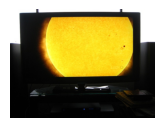

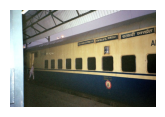

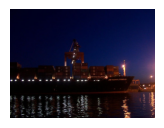

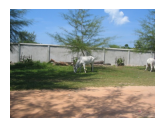

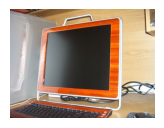

In [ ]:
print_photos(voc_dataset, 5)

In [ ]:
# Launch the FiftyOne App to explore the dataset
session = fo.launch_app(voc_dataset)

In [ ]:
print_ground_truth(voc_dataset, 5)

Image:  /root/fiftyone/voc-2012/validation/data/000001.jpg
  Annotation 1:
    Class: tvmonitor, Bounding Box: [0.068, 0.029333333333333333, 0.828, 0.752]


Image:  /root/fiftyone/voc-2012/validation/data/000002.jpg
  Annotation 1:
    Class: train, Bounding Box: [0.092, 0.03303303303303303, 0.908, 0.9669669669669669]
  Annotation 2:
    Class: person, Bounding Box: [0.124, 0.5705705705705706, 0.042, 0.15915915915915915]


Image:  /root/fiftyone/voc-2012/validation/data/000003.jpg
  Annotation 1:
    Class: boat, Bounding Box: [0.002, 0.6133333333333333, 0.854, 0.168]


Image:  /root/fiftyone/voc-2012/validation/data/000004.jpg
  Annotation 1:
    Class: cow, Bounding Box: [0.434, 0.42933333333333334, 0.154, 0.16]
  Annotation 2:
    Class: cow, Bounding Box: [0.93, 0.44533333333333336, 0.07, 0.136]


Image:  /root/fiftyone/voc-2012/validation/data/000005.jpg
  Annotation 1:
    Class: tvmonitor, Bounding Box: [0.182, 0.04, 0.602, 0.9013333333333333]




500
375


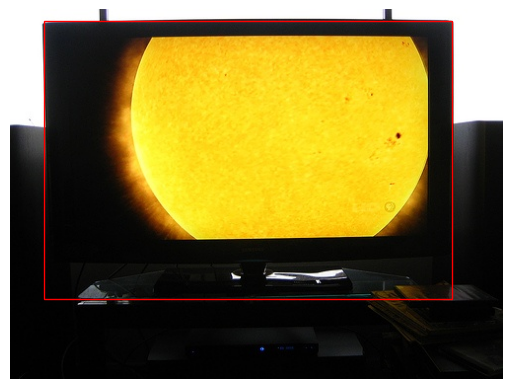

500
333


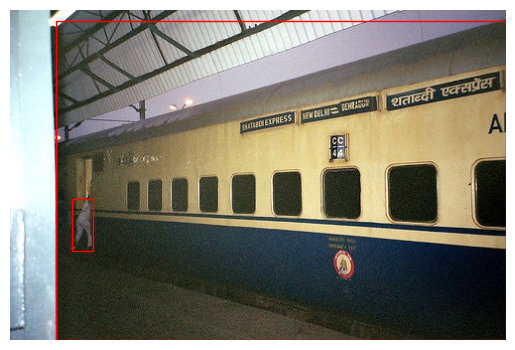

500
375


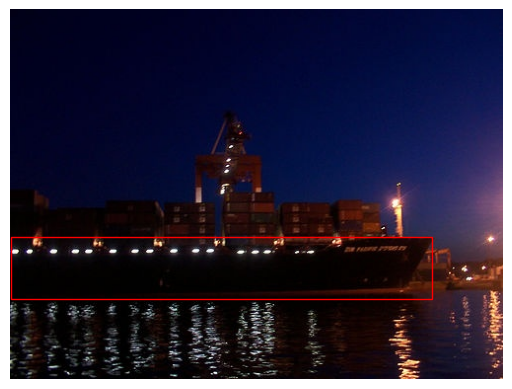

500
375


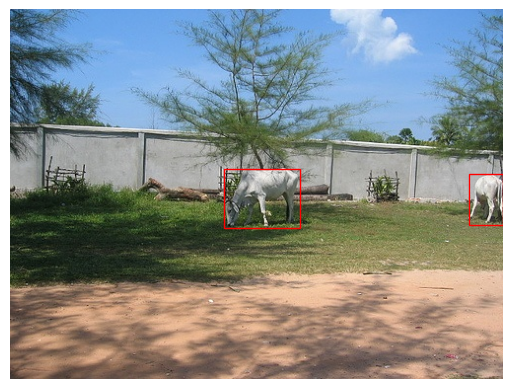

500
375


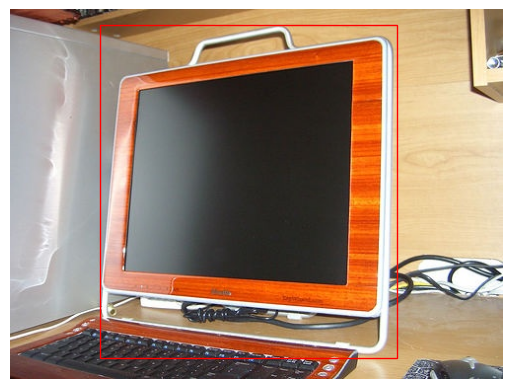

In [ ]:
visualize_ground_truth(voc_dataset, 5)

In [ ]:
voc_nonNumeric_classes = nonNumeric_classes(voc_dataset)

**FUNCTIONS**

In [ ]:
def handle_predictions(model, model_name, dataset, classes,dataset_name):
  print("--------------------------------Add predictions --------------------------------")
  # creates a PyTorch device object. If CUDA is available (True), it sets the device to use CUDA ("cuda:0"); otherwise, it sets the device to use the CPU ("cpu").
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model.to(device)   # moves the neural network model to the specified device.
  model.eval() # evaluation mode disables specific layers like dropout and batch normalization that are used during training.


  # Add predictions to samples
  with fo.ProgressBar() as pb:
      for sample in pb(dataset): # It loops through each sample in the provided dataset
          # Load image
          image = Image.open(sample.filepath)
          image = func.to_tensor(image).to(device)
          channels, height, width = image.shape
          # print(image.shape)

          # passing the input image through the model to obtain predictions. This typically involves a forward pass
          preds = model([image])[0]
          labels = preds["labels"].cpu().detach().numpy()
          scores = preds["scores"].cpu().detach().numpy()
          boxes = preds["boxes"].cpu().detach().numpy()

          # Convert detections to FiftyOne format
          detections = []
          for label, score, box in zip(labels, scores, boxes):
              # Convert to [top-left-x, top-left-y, bottom-right-x (width), bottom-right-y (height)]
              x1, y1, x2, y2 = box
              # normalized between 0 and 1.
              normalized_box = [x1 / width, y1 / height, (x2 - x1) / width, (y2 - y1) / height]

              detections.append(
                  fo.Detection(
                      label=classes[label],
                      bounding_box=normalized_box,
                      confidence=score
                  )
              )

          # Save predictions to dataset
          sample[f'{dataset_name}_predictions_of_{model_name}'] = fo.Detections(detections=detections)
          sample.save()

  print('Finished predictions for ', model_name)

In [ ]:
def high_conf_dataset(dataset,model_name,dataset_name,classes):
  return (dataset
         .filter_labels(f"{dataset_name}_predictions_of_{model_name}", F("confidence") > 0.5, only_matches=False)
         # keep only samples where the confidence scores are greater than 0.5. samples with no matches after filtering are retained.
         .filter_labels(f"{dataset_name}_predictions_of_{model_name}", F("label").is_in(classes), only_matches=False)
         # keep only samples where the predicted label ("label") is among the specified classes provided in the classes list.
  )

In [ ]:
def evaluate(high_conf_dataset,model_name,dataset_name):
  print("------------------- Evaluate Detections-------------------------")
  results = high_conf_dataset.evaluate_detections(
      f"{dataset_name}_predictions_of_{model_name}",
      gt_field="ground_truth",
      eval_key="eval",
      classwise=False, # for the dataset as a whole
      compute_mAP=True,
      )
  return results

In [ ]:
def print_classes_classification_report_and_curves(results,classes):
  results.print_report(classes=classes)
  plot = results.plot_pr_curves(classes=classes)
  plot.show()


In [ ]:
def print_classes_confusionMatrix(results,classes):
  plot = results.plot_confusion_matrix(classes=classes)
  plot.show()

In [ ]:
def model_processing(model, model_name, dataset, classes, nonNumeric_classes,name):

  handle_predictions(model, model_name, dataset, classes,name)
  high_conf_Dataset= high_conf_dataset(dataset,model_name,name,nonNumeric_classes)

  results = evaluate(high_conf_Dataset,model_name,name)


  print("------------------------------classes classification report------------------------------")
  print_classes_classification_report_and_curves(results,nonNumeric_classes)
  print("------------------------------classes cnfusion matrix------------------------------")
  print_classes_confusionMatrix(results,nonNumeric_classes)
  print("------------------------------ MAP value ------------------------------")
  print(results.mAP())

  return high_conf_Dataset,results

In [ ]:
def model_processing2(model, model_name, dataset, classes, nonNumeric_classes, name, results):
  high_conf_coco = high_conf_dataset(dataset, model_name, name, nonNumeric_classes)
  print("------------------------ the most occured classes (top 20) --------------------------- ")
  coco_counts = high_conf_coco.count_values("ground_truth.detections.label")
  coco_mostOccured_classes = sorted(coco_counts, key=coco_counts.get, reverse=True)[:20]
  print_classes_classification_report_and_curves(results, coco_mostOccured_classes)
  print("------------------------------classes cnfusion matrix------------------------------")
  print_classes_confusionMatrix(results, coco_mostOccured_classes)

***MODELS***

In [ ]:
retinanet_model = models.retinanet_resnet50_fpn(pretrained=True, progress=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:01<00:00, 85.5MB/s]


In [ ]:
coco_session1 = fo.launch_app(coco_dataset)

In [ ]:
high_conf_coco1,results_coco1=model_processing(retinanet_model, 'retinanet_resnet50_fpn', coco_dataset, coco_dataset.default_classes,coco_nonNumeric_classes,'coco')

--------------------------------Add predictions --------------------------------
 100% |███████████████| 5000/5000 [16.0m elapsed, 0s remaining, 6.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [16.0m elapsed, 0s remaining, 6.2 samples/s]      


Finished predictions for  retinanet_resnet50_fpn
------------------- Evaluate Detections-------------------------
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5000/5000 [2.6m elapsed, 0s remaining, 45.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [2.6m elapsed, 0s remaining, 45.5 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5000/5000 [1.3m elapsed, 0s remaining, 48.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.3m elapsed, 0s remaining, 48.3 samples/s]      


------------------------------classes classification report------------------------------
                precision    recall  f1-score   support

        person       0.89      0.64      0.75     11384
       bicycle       0.76      0.41      0.53       317
           car       0.81      0.51      0.63      1967
    motorcycle       0.82      0.55      0.66       377
      airplane       0.80      0.79      0.80       143
           bus       0.80      0.66      0.72       285
         train       0.76      0.75      0.75       190
         truck       0.59      0.35      0.44       415
          boat       0.70      0.33      0.45       431
 traffic light       0.71      0.39      0.51       638
  fire hydrant       0.88      0.71      0.79       101
     stop sign       0.77      0.67      0.71        75
 parking meter       0.92      0.55      0.69        60
         bench       0.64      0.24      0.35       413
          bird       0.89      0.46      0.60       462
           ca

------------------------------classes cnfusion matrix------------------------------


/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



------------------------------ MAP value ------------------------------
0.2920477194678416


In [ ]:
model_processing2(retinanet_model, 'retinanet_resnet50_fpn', coco_dataset, coco_dataset.default_classes, coco_nonNumeric_classes,'coco', results_coco1)

------------------------ the most occured classes (top 20) --------------------------- 
               precision    recall  f1-score   support

       person       0.89      0.64      0.75     11384
          car       0.81      0.51      0.63      1967
        chair       0.71      0.23      0.35      1798
         book       0.65      0.06      0.12      1165
       bottle       0.80      0.36      0.49      1044
          cup       0.78      0.39      0.52       903
 dining table       0.70      0.25      0.37       697
traffic light       0.71      0.39      0.51       638
         bowl       0.73      0.35      0.48       628
      handbag       0.57      0.11      0.18       540
         bird       0.89      0.46      0.60       462
         boat       0.70      0.33      0.45       431
        truck       0.59      0.35      0.44       415
        bench       0.64      0.24      0.35       413
     umbrella       0.81      0.45      0.58       421
          cow       0.82      0

------------------------------classes cnfusion matrix------------------------------


/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



In [ ]:
print("Top classes:")
coco_counts1 = high_conf_coco1.count_values("ground_truth.detections.label")
coco_top_classes1 = sorted(coco_counts1, key=coco_counts1.get, reverse=True)
print_classes_classification_report_and_curves(results_coco1, coco_top_classes1)

Top classes:
                precision    recall  f1-score   support

        person       0.89      0.64      0.75     11384
           car       0.81      0.51      0.63      1967
         chair       0.71      0.23      0.35      1798
          book       0.65      0.06      0.12      1165
        bottle       0.80      0.36      0.49      1044
           cup       0.78      0.39      0.52       903
  dining table       0.70      0.25      0.37       697
 traffic light       0.71      0.39      0.51       638
          bowl       0.73      0.35      0.48       628
       handbag       0.57      0.11      0.18       540
          bird       0.89      0.46      0.60       462
          boat       0.70      0.33      0.45       431
         truck       0.59      0.35      0.44       415
         bench       0.64      0.24      0.35       413
      umbrella       0.81      0.45      0.58       421
           cow       0.82      0.61      0.70       391
        banana       0.70      0.2

In [ ]:
print("True +ve: %d" % high_conf_coco1.sum("eval_tp"))
print("False +ve: %d" % high_conf_coco1.sum("eval_fp"))
print("False -ve: %d" % high_conf_coco1.sum("eval_fn"))

True +ve: 17726
False +ve: 4110
False -ve: 19634


**IOU & Frequency**

In [ ]:
iou_freq_coco = collections.defaultdict(int)
for sample in high_conf_coco1:
  for detection in sample.coco_predictions_of_retinanet_resnet50_fpn.detections:
    if 'eval_iou' in detection:
      iou_freq_coco[np.round(detection.eval_iou, 1)] += 1

for k,v in iou_freq_coco.items():
  print(k, v)

1.0 2838
0.9 8119
0.8 3899
0.5 401
0.7 1970
0.6 1151


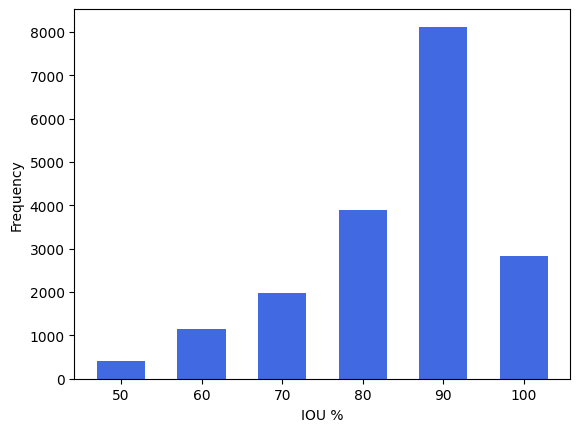

In [ ]:
iou_freq_coco = collections.OrderedDict(sorted(iou_freq_coco.items()))
x = [k*100 for k in iou_freq_coco.keys()]
y = iou_freq_coco.values()

plt.bar(x, y, color='royalblue', width=6)
plt.xlabel('IOU %')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def show_results(high_conf, dataName):
  samples_to_show = high_conf

# Display the images with bounding boxes
  fig, axes = plt.subplots(2, 5, figsize=(15, 6))
  for i, sample in enumerate(samples_to_show):
    img = plt.imread(sample.filepath)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')

    # Get the detections from the sample

    detections = sample.get_field(dataName).detections

    # Draw bounding boxes on the image
    for detection in detections:
        bbox = detection.bounding_box
        x, y, w, h = bbox
        rect = patches.Rectangle(
            (x * img.shape[1], y * img.shape[0]),
            w * img.shape[1],
            h * img.shape[0],
            linewidth=1,
            edgecolor='r',
            facecolor='none'
        )
        ax.add_patch(rect)

  plt.tight_layout()
  plt.show()

In [ ]:
#show results
coco_session1.view = high_conf_coco1

In [ ]:
print("success")
successResults = high_conf_coco1.sort_by("eval_tp", reverse=True)[:10]
coco_session1.view = high_conf_coco1.sort_by("eval_tp", reverse=True)

success


In [ ]:
def show_results(high_conf, dataName):
  samples_to_show = high_conf

# Display the images with bounding boxes
  fig, axes = plt.subplots(2, 5, figsize=(15, 6))
  for i, sample in enumerate(samples_to_show):
    img = plt.imread(sample.filepath)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')

    # Get the detections from the sample

    detections = sample.get_field(dataName).detections

    # Draw bounding boxes on the image
    for detection in detections:
        bbox = detection.bounding_box
        x, y, w, h = bbox
        rect = patches.Rectangle(
            (x * img.shape[1], y * img.shape[0]),
            w * img.shape[1],
            h * img.shape[0],
            linewidth=1,
            edgecolor='r',
            facecolor='none'
        )
        ax.add_patch(rect)

  plt.tight_layout()
  plt.show()

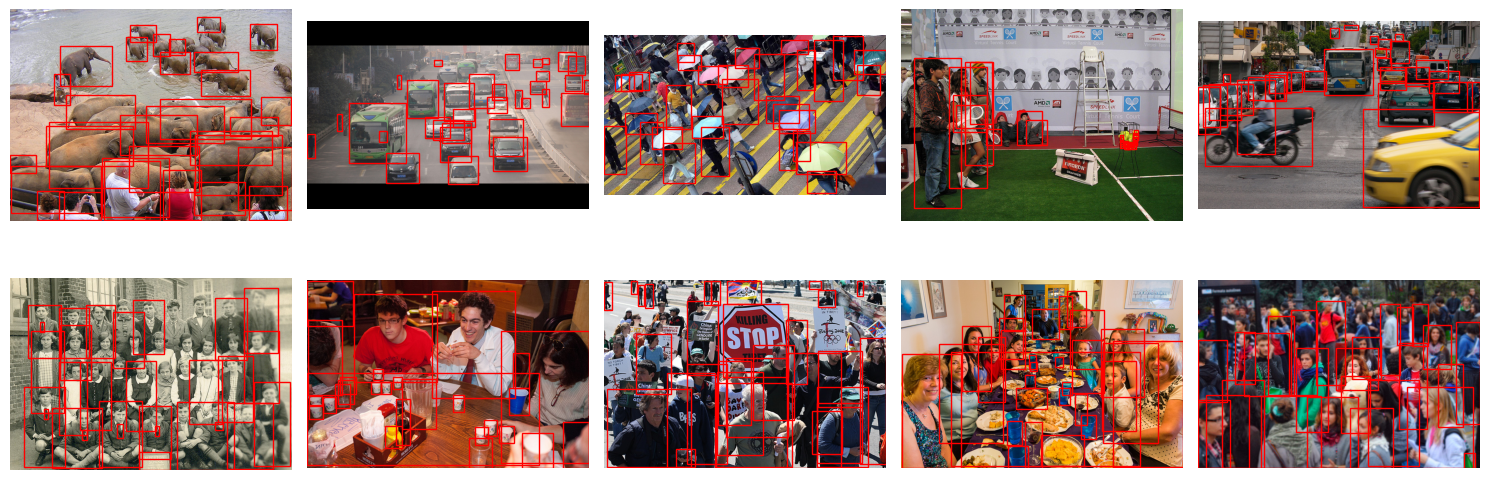

In [ ]:
show_results(successResults, "coco_predictions_of_retinanet_resnet50_fpn")

In [ ]:
print("failure")
failureResults = high_conf_coco1.sort_by("eval_tp", reverse=False)[:10]
coco_session1.view = high_conf_coco1.sort_by("eval_tp", reverse=False)

failure


**VOC session**

In [ ]:
voc_session1 = fo.launch_app(voc_dataset)

In [ ]:
high_conf_voc1, results_voc1 = model_processing(retinanet_model, 'retinanet_resnet50_fpn', voc_dataset, coco_dataset.default_classes, voc_nonNumeric_classes, 'voc')

--------------------------------Add predictions --------------------------------
 100% |███████████████| 5823/5823 [16.9m elapsed, 0s remaining, 6.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [16.9m elapsed, 0s remaining, 6.6 samples/s]      


Finished predictions for  retinanet_resnet50_fpn
------------------- Evaluate Detections-------------------------
Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5823/5823 [1.2m elapsed, 0s remaining, 67.1 samples/s]        


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.2m elapsed, 0s remaining, 67.1 samples/s]        


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5823/5823 [47.4s elapsed, 0s remaining, 119.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [47.4s elapsed, 0s remaining, 119.2 samples/s]      


------------------------------classes classification report------------------------------
              precision    recall  f1-score   support

   aeroplane       0.00      0.00      0.00       484
     bicycle       0.80      0.75      0.77       380
        bird       0.87      0.71      0.78       629
        boat       0.75      0.52      0.61       491
      bottle       0.80      0.49      0.61       733
         bus       0.89      0.80      0.84       320
         car       0.81      0.69      0.75      1173
         cat       0.84      0.89      0.86       618
       chair       0.70      0.48      0.57      1449
         cow       0.77      0.75      0.76       347
 diningtable       0.00      0.00      0.00       374
         dog       0.80      0.80      0.80       773
       horse       0.82      0.83      0.82       373
   motorbike       0.00      0.00      0.00       376
      person       0.81      0.81      0.81      5110
 pottedplant       0.00      0.00      0.00  

------------------------------classes cnfusion matrix------------------------------


/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



------------------------------ MAP value ------------------------------
0.3497371979139764


In [ ]:
print("Top classes:")
voc_counts1 = high_conf_voc1.count_values("ground_truth.detections.label")
voc_top_classes1 = sorted(voc_counts1, key=voc_counts1.get, reverse=True)
print_classes_classification_report_and_curves(results_voc1, voc_top_classes1)
# Print some statistics about the total TP/FP/FN counts
print("True +ve: %d" % high_conf_voc1.sum("eval_tp"))
print("False +ve: %d" % high_conf_voc1.sum("eval_fp"))
print("False -ve: %d" % high_conf_voc1.sum("eval_fn"))

Top classes:
              precision    recall  f1-score   support

      person       0.81      0.81      0.81      5110
       chair       0.70      0.48      0.57      1449
         car       0.81      0.69      0.75      1173
         dog       0.80      0.80      0.80       773
      bottle       0.80      0.49      0.61       733
        bird       0.87      0.71      0.78       629
         cat       0.84      0.89      0.86       618
 pottedplant       0.00      0.00      0.00       542
        boat       0.75      0.52      0.61       491
       sheep       0.87      0.70      0.77       485
   aeroplane       0.00      0.00      0.00       484
   tvmonitor       0.00      0.00      0.00       414
        sofa       0.00      0.00      0.00       387
     bicycle       0.80      0.75      0.77       380
   motorbike       0.00      0.00      0.00       376
 diningtable       0.00      0.00      0.00       374
       horse       0.82      0.83      0.82       373
         cow  

True +ve: 9584
False +ve: 2349
False -ve: 6203


**IOU&Frequency**

In [ ]:
iou_freq_voc = collections.defaultdict(int)
for sample in high_conf_voc1:
  for detection in sample.voc_predictions_of_retinanet_resnet50_fpn.detections:
    if 'eval_iou' in detection:
      iou_freq_voc[np.round(detection.eval_iou, 1)] += 1

for k,v in iou_freq_voc.items():
  print(k, v)

0.8 2091
1.0 1650
0.9 4296
0.6 576
0.7 1016
0.5 202


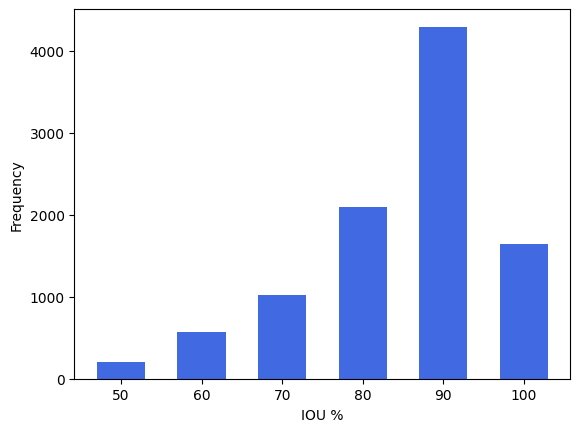

In [ ]:
iou_freq_voc = collections.OrderedDict(sorted(iou_freq_voc.items()))
x = [k*100 for k in iou_freq_voc.keys()]
y = iou_freq_voc.values()

plt.bar(x, y, color='royalblue', width=6)
plt.xlabel('IOU %')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#show results
voc_session1.view = high_conf_voc1

In [ ]:
print("success")
voc_session1.view = high_conf_voc1.sort_by("eval_tp", reverse=True)

success


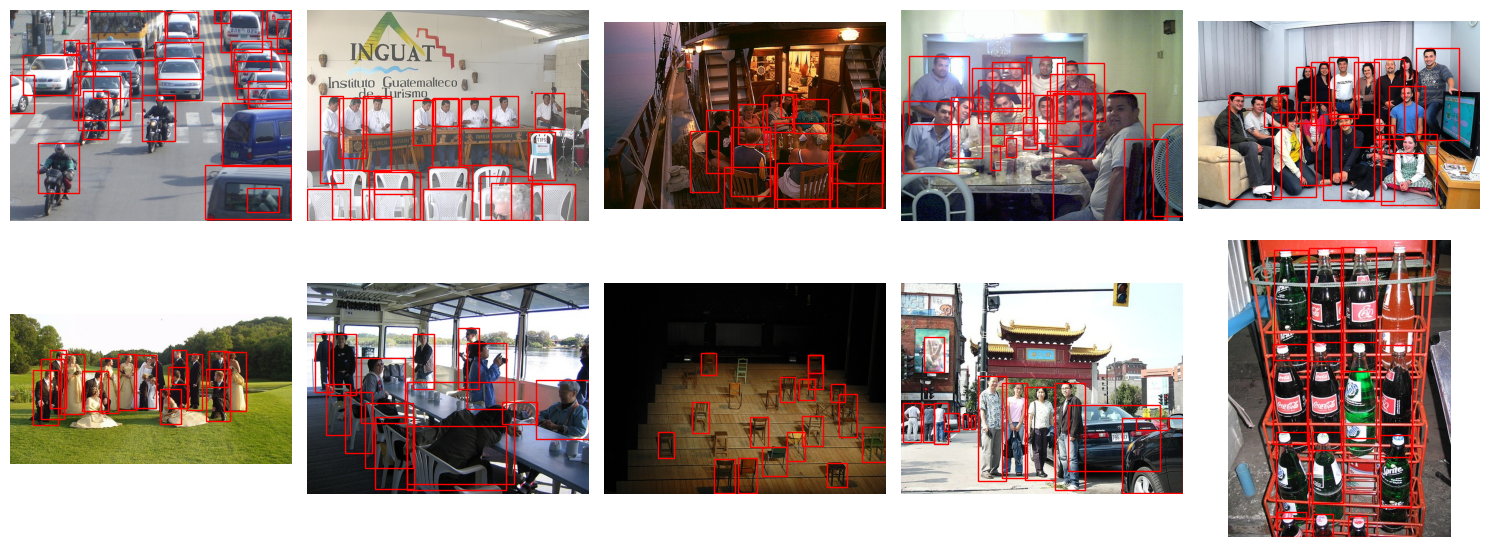

In [ ]:
show_results(successResults, "voc_predictions_of_retinanet_resnet50_fpn")

In [ ]:
print("failure")
failureResults = high_conf_voc1.sort_by("eval_tp", reverse=False)[:10]
voc_session1.view = high_conf_voc1.sort_by("eval_tp", reverse=False)


failure
